In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from statistics import mean 
import glob
import random

In [37]:
#200 images in each train
group1 = [cv2.imread(file) for file in glob.glob('TrainCharacters/1/*.jpg')]
group2 = [cv2.imread(file) for file in glob.glob('TrainCharacters/2/*.jpg')]
group3 = [cv2.imread(file) for file in glob.glob('TrainCharacters/3/*.jpg')]

#100 images in each test
test1 = [cv2.imread(file) for file in glob.glob('TestCharacters/1/*.jpg')]
test2 = [cv2.imread(file) for file in glob.glob('TestCharacters/2/*.jpg')]
test3 = [cv2.imread(file) for file in glob.glob('TestCharacters/3/*.jpg')]

groups = [group1 , group2 , group3]
tests = [test1 , test2 , test3]

In [38]:
def resizing(groups):

    #resizing all images to 32 X 32 gray images
    #considering each pixel as a feature
    #converting image which is a numpy.ndarray into (32*32) X 1 

    for group in groups:
        for i in range(len(group)):
            img = cv2.resize(group[i], (0, 0), fx = 0.25, fy = 0.25)
            gray_img = np.mean(img,axis = 2)
            group[i] = np.resize(gray_img,(32*32,1))

    return groups

In [39]:
groups = resizing(groups)
tests = resizing(tests)

In [40]:
mean1 = np.mean(group1,axis=0)
mean2 = np.mean(group2,axis=0)
mean3 = np.mean(group3,axis=0) 

 ## TASK -1

 Implement the nearest mean classifier by consideringthe covariance matrix of each class to be the identity matrix

In [41]:
#in multivariate model - calculating the decision terms
#-ln(det(covarience matrix)) will not be considered as it is same of all groups
# -(transpose(x-mean)*covarience-matrix*(x-mean)) will become -(transpose(x-mean)*(x-mean)) since co-varience is an identity matrix

def find_group_method4(img):

    val1 = -(np.transpose(img-mean1))@(img-mean1)
    val2 = -(np.transpose(img-mean2))@(img-mean2)
    val3 = -(np.transpose(img-mean3))@(img-mean3)
    
    maxi = max(val1,val2,val3)

    if maxi == val1:
        return 1

    elif maxi == val2:
        return 2

    else:
        return 3

In [42]:
errors = []
#collecting 4 error images from group1 for next question
images = {i:[] for i in range(1,4)} #since there are 3 classes
i = 1
for test in tests:
    error = 0
    for index in range(len(test)):
        val = find_group_method4(test[index])
        if val != i:
            error += 1
            images[i].append(index)
            
    print("group",i,"-> Accuracy:",100 - error)
    errors.append(error) 
    i += 1

print("Average Accuracy of model1 is: ",100 - mean(errors))

group 1 -> Accuracy: 86
group 2 -> Accuracy: 89
group 3 -> Accuracy: 100
Average Accuracy of model1 is:  91.66666666666667


## TASK-2

4 examples of images from the test set that are mis-classified by each classifier 
Display both the true label and the predicted class for eachimage.

In [43]:
print(images)

{1: [7, 15, 25, 37, 48, 60, 66, 68, 81, 82, 86, 91, 96, 97], 2: [3, 6, 19, 25, 26, 52, 60, 77, 83, 90, 93], 3: []}


In [44]:
#since there are no error prediction in group 3 , selecting 2 images from group 1 and 2 each

ind1 = random.sample(images[1], 2)
ind2 = random.sample(images[2], 2)

for i in ind1:
    print("True Lable: Group 1")
    val = find_group_method4(test1[i])
    print("Predicted Lable: Group ",val)
    print("\n")

for i in ind2:
    print("True Lable: Group 2")
    val = find_group_method4(test1[i])
    print("Predicted Lable: Group ",val)
    print("\n")

True Lable: Group 1
Predicted Lable: Group  3


True Lable: Group 1
Predicted Lable: Group  2


True Lable: Group 2
Predicted Lable: Group  1


True Lable: Group 2
Predicted Lable: Group  1




## TASK - 3

In [84]:
data = pd.read_csv("data.csv",header=None)
data.rename(columns = {0:'X', 1:'Y'}, inplace = True)
data

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


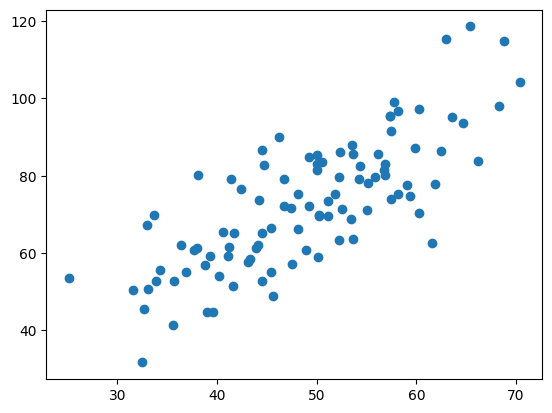

In [85]:
plt.scatter(data['X'], data['Y'])
plt.show()

In [86]:
def standardization(series):
    return (series - series.mean()) / series.std()

for col in data.columns:
    data[col] = standardization(data[col])

In [88]:
Z = data.to_numpy()


In [89]:
#covarience of Z
cov = np.transpose(Z) @ Z

In [90]:
V,D,V_ = np.linalg.svd(cov)
#D is the diagonal matrix containing eigen values in its diagonal

In [98]:
maxi = 0
index = 0
for i in range(len(D)):
        if D[i] > maxi:
            index += 1
            maxi = max(maxi , D[i])

print("column",index ,"is the PCA")

column 1 is the PCA


In [91]:
#The columns corresponding to maximum eigen value are the principle axis components

## TASK - 4

In [55]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
